## Understanding convolution

Some notes and experimients to understand convolution and then understand the difference between convolution and cross correlation.

The main diference between these two is thar in one the window is reversed. Let's start with the definition of convolution for a descrete signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ x[n] * h[n]=\sum_{k=n}^{N} x[k]\cdot h[n - k] = y[n]$$

Example with the built in function  that is in numpy.

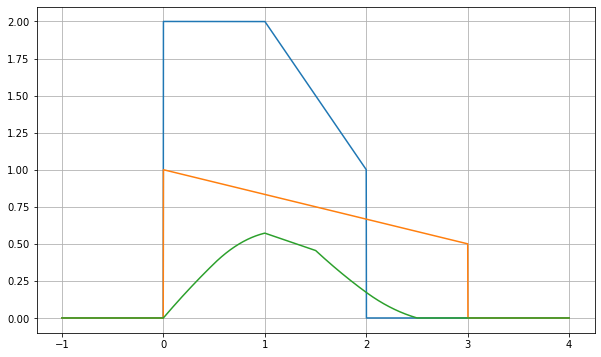

In [66]:
t = np.linspace(0,3,1500)

x = -t + 3
x = np.hstack([np.ones(500)*2, x[500:1000], np.zeros(500)])
x = np.hstack([np.zeros(500), x, np.zeros(500)])

h = -t/6 + 1
h = np.hstack([np.zeros(500), h, np.zeros(500)])

new_t = np.linspace(-1,4, 2500)

conv = np.convolve(x, h)/len(x)
t_conv = np.linspace(-1, 4, 5000-1)

plt.plot(new_t, x)
plt.plot(new_t, h)
plt.plot(t_conv, conv)
plt.grid()

Some functions that I copy from this yt video [link](https://www.youtube.com/watch?v=zoRJZDiPGds&t=298s) to check the result. First thing to understand is the amplitud of the convolution that is mamy orders of magnitude higher than the the original signal, and the other things that I need to understand is why the signal has the lenght M + N - 1. In this example I add zeros for a better visualization but I break the intuition of this relation because if I don't misunderstand as the sample size duplicates the time diferention has to duplicate too and in this case the margins of the t_conv are the same as new_t and I think it should be from -3.5 to 6.5. The following code is the implementation following the definition.

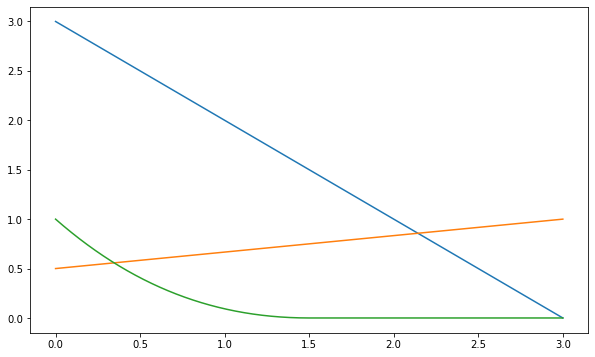

In [79]:
t = np.linspace(0,3,1500)

h = -t/6 + 1
x = -t + 3
x_pad = np.hstack([x, np.zeros(len(h))])

h = h[::-1]
y = np.zeros(len(x) + len(h) - 1)

for n in range(len(x)):
    for k in range(len(h)):
        y[n] += x_pad[n + k] * h[k]

t_conv = np.linspace(0, 3, len(y))        

plt.plot(t, x)
plt.plot(t, h)
plt.plot(t_conv, y/max(y))

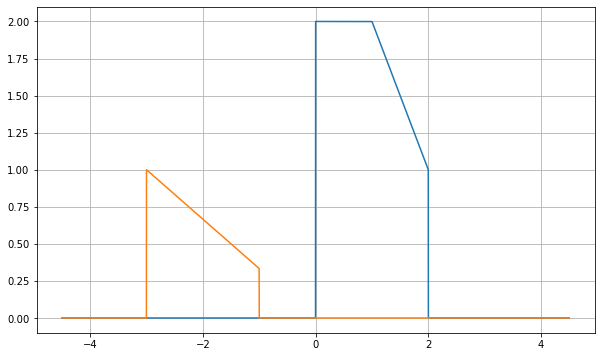

In [80]:
fs = 500

t = np.linspace(0,3,3* fs)

#Define the functions
x = -t + 3
x = np.hstack([np.ones(500)*2, x[500:1000], np.zeros(500)])

h = -t[0:2*fs]/3 + 1

#Add zeros to the visualization
org_len = len(x)
org_len_h = len(h)
margin_extra = len(x)//2

x = np.hstack([np.zeros(margin_extra + len(x)), x, np.zeros(margin_extra)])
t_new = np.linspace(-(margin_extra + org_len)/fs , (margin_extra + org_len)/fs, (margin_extra + org_len)*2)

h_not_inv = np.hstack([np.zeros(margin_extra), h, np.zeros(len(t_new) - len(h) - margin_extra)])
h_inverse = np.hstack([np.zeros(margin_extra), h[::-1], np.zeros(len(t_new) - len(h) - margin_extra)])

plt.plot(t_new, x)
plt.plot(t_new, h_not_inv)
plt.grid()

In [81]:
def calculate_conv(x, h_inverse, i, inital_shift):
    
    n_len = i - inital_shift
    
    h_inverse = np.roll(h_inverse, n_len)

    conv_area = x * h_inverse
    
    conv_sum = sum(conv_area)
    
    return h_inverse, conv_area, conv_sum

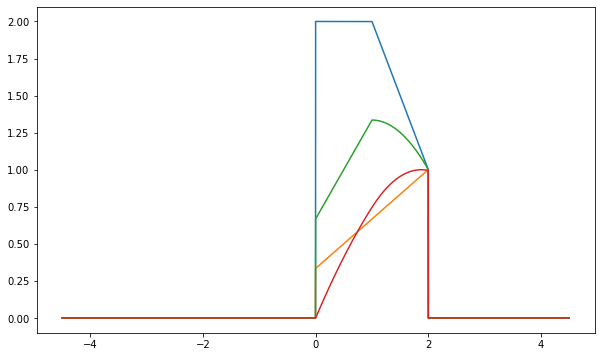

In [91]:
conv_sum = np.zeros(len(t_new))

n = 1500 #Check until what n is viable

#I was manually adjusting this values for the visualization, try to automize
initial_shift = 0
start_conv = 1750

for i in range(n):
    h_inv, area, suma = calculate_conv(x, h_inverse, i, initial_shift)
    
    index_conv = (i + start_conv) % len(t_new)
    conv_sum[index_conv] = suma
    
plt.plot(t_new, x)
plt.plot(t_new, h_inv)
plt.plot(t_new, area)
plt.plot(t_new, conv_sum / max(conv_sum))

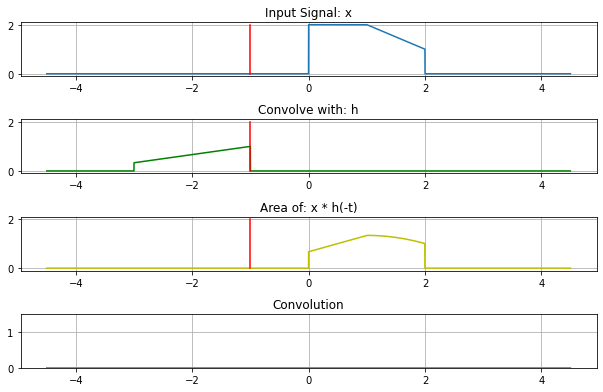

In [92]:
import matplotlib.animation as anim
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(4)

start_slide = t_new[list(h_inverse).index(max(h_inverse))]  #Start aniamtion with slide in 0 
start_slide = margin_extra + org_len_h

final_convolution = np.zeros(len(t_new))

line, = ax[0].plot(t_new, x)
line2, = ax[0].plot((t_new[start_slide], t_new[start_slide]), (0, 2), color='r')
line3, = ax[1].plot(t_new, h_inverse, color='g')
line4, = ax[1].plot((t_new[start_slide], t_new[start_slide]), (0, 2), color='r')
line5, = ax[2].plot(t_new, area, color='y')
#ax[2].fill_between(t_new, area)
line6, = ax[2].plot((t_new[start_slide], t_new[start_slide]), (0, 2), color='r')
line7, = ax[3].plot(t_new, final_convolution, color='c')
ax[3].set_ylim([0,1.5])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                 hspace=0.8)

titles =['Input Signal: x', 'Convolve with: h', 'Area of: x * h(-t)', 'Convolution']
for i in range(4):
    ax[i].grid()
    ax[i].title.set_text(titles[i])

def animation(i):
    initial_shift = 0
    start_conv = 1750
    
    new_h, new_conv, sum_conv = calculate_conv(x, h_inverse, i, initial_shift)
    
    index_conv = (i + start_conv) % len(t_new)
    final_convolution[index_conv] = sum_conv
    
    index_slide = (i + start_slide) % len(t_new)

    line2.set_xdata((t_new[index_slide], t_new[index_slide]))

    line3.set_ydata(new_h)
    
    line4.set_xdata((t_new[index_slide], t_new[index_slide]))
    
    line5.set_ydata(new_conv)
    #ax[2].fill_between(t_new, new_conv)
    
    line6.set_xdata((t_new[index_slide], t_new[index_slide]))
    
    #ax[3].set_ylim(max(final_convolution))
    line7.set_ydata(final_convolution/max(final_convolution))
    
    return line,

ani = anim.FuncAnimation(fig, animation, interval = 5, frames=3500)

In [93]:
from IPython.display import HTML
HTML(ani.to_html5_video())

C:\Users\matia\AppData\Local\Temp/ipykernel_14612/748476595.py:55: RuntimeWarning: invalid value encountered in true_divide
  line7.set_ydata(final_convolution/max(final_convolution))


Test with sliders in Jupyter

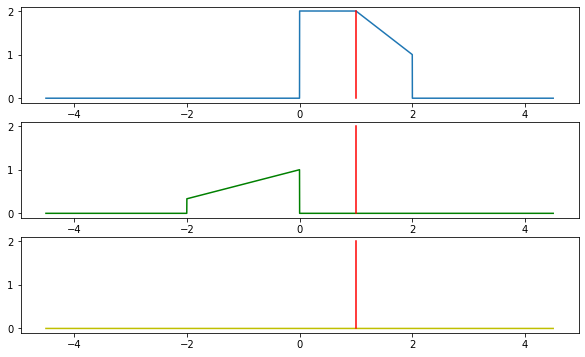

In [201]:
from IPython.display import display, clear_output
import ipywidgets as widgets

def calculate_conv(x, h_inverse, i):
    slide = i
    
    n_len = int(slide*fs)
    
    h_inverse = np.roll(h_inverse, n_len)

    conv = x * h_inverse
    
    return h_inverse, conv

fig, ax = plt.subplots(3)

start_slide = int(t_new[list(h_inverse).index(max(h_inverse))])


line, = ax[0].plot(t_new, x)
line2, = ax[0].plot((slide - start_slide, slide - start_slide), (0, 2), color='r')
line3, = ax[1].plot(t_new, h_inverse, color='g')
line4, = ax[1].plot((slide - start_slide, slide - start_slide), (0, 2), color='r')
line5, = ax[2].plot(t_new, conv, color='y')
line6, = ax[2].plot((slide - start_slide, slide - start_slide), (0, 2), color='r')

def interactive_graph(i):
    
    initial_shift = 0
    start_conv = 750
    
    new_h, new_conv = calculate_conv(x, h_inverse, i)
    
    index_conv = (i + start_conv) % len(t_new)
    line2.set_xdata((i - start_slide, i - start_slide))

    line3.set_ydata(new_h)
    
    line4.set_xdata((i - start_slide, i - start_slide))
    
    line5.set_ydata(new_conv)
    
    line6.set_xdata((i - start_slide, i - start_slide))
    
    display(fig)
    clear_output(wait=True)


In [202]:
widgets.interact(interactive_graph, i=(-4.0,4.0));

interactive(children=(FloatSlider(value=0.0, description='i', max=4.0, min=-4.0), Output()), _dom_classes=('wi…

The analisis for the correlation is the same but the window signal is not reversed. I define the previous steps in functions so the implementation is easier.

In [ ]:
def padding_and_space_for_animation(x, h, fs):
    org_len = len(x)
    margin_extra = len(x)//2

    x_new = np.hstack([np.zeros(margin_extra + len(x)), x, np.zeros(margin_extra)])
    t_new = np.linspace(-(margin_extra + org_len)/fs , (margin_extra + org_len)/fs, (margin_extra + org_len)*2)

    h_new = np.hstack([np.zeros(margin_extra), h, np.zeros(len(t_new) - len(h) - margin_extra)])
    
    return x_new, h_new, t_new

def calculate(x, h, i, initial_shift):  #Remember to inverse the h signal if is convolution
    
    n_len = i - initial_shift
    
    h_shift = np.roll(h, n_len)

    conv_area = x * h_shift
    
    conv_sum = sum(conv_area)
    
    return h, conv_area, conv_sum

def animation(i):
    initial_shift = 0
    start_conv = 1750
    start_slide = margin_extra + org_len_h
    
    new_h, new_conv, sum_conv = calculate_conv(x, h_inverse, i, initial_shift)
    
    index_conv = (i + start_conv) % len(t_new)
    final_convolution[index_conv] = sum_conv
    
    index_slide = (i + start_slide) % len(t_new)

    line2.set_xdata((t_new[index_slide], t_new[index_slide]))

    line3.set_ydata(new_h)
    
    line4.set_xdata((t_new[index_slide], t_new[index_slide]))
    
    line5.set_ydata(new_conv)
    ax[2].fill_between(t_new, new_conv)
    
    line6.set_xdata((t_new[index_slide], t_new[index_slide]))
    
    #ax[3].set_ylim(max(final_convolution))
    line7.set_ydata(final_convolution/max(final_convolution))
    
    return line,

def made_graph(operation ='convolution'):
    plt.rcParams['figure.figsize'] = [10, 6]

    fig, ax = plt.subplots(4)

    start_slide = margin_extra + org_len_h

    final_convolution = np.zeros(len(t_new))

    line, = ax[0].plot(t_new, x)
    line2, = ax[0].plot((slide + start_slide, slide + start_slide), (0, 2), color='r')
    line3, = ax[1].plot(t_new, h_inverse, color='g')
    line4, = ax[1].plot((slide + start_slide, slide + start_slide), (0, 2), color='r')
    line5, = ax[2].plot(t_new, conv, color='y')
    ax[2].fill_between(t_new, conv)
    line6, = ax[2].plot((slide + start_slide, slide + start_slide), (0, 2), color='r')
    line7, = ax[3].plot(t_new, final_convolution, color='c')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                     hspace=0.8)
    
    if operation == 'convolution':
        titles = ['Input Signal: x', 'Convolve with: h', 'Area of: x * h(-t)', 'Convolution']
        
    if opreation == 'correlation':
        titles = ['Input Signal: x', 'Cross-Correlate with: h', 'Area of: x * h(t)', 'Cross-Correlation']
        
    for i in range(4):
        ax[i].grid()
        ax[i].title.set_text(titles[i])
    
    ani = anim.FuncAnimation(fig, animation, interval = 5, frames=len(t_new))
    
    return ani